Required
Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review.Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or 

---

the Head of Analytics at your company.

---


Sections required in your report:

- Brief description of the data set and a summary of its attributes /

- Initial plan for data exploration /

- Actions taken for data cleaning and feature engineering

- Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner /

- Formulating at least 3 hypothesis about this data

- Conducting a formal significance test for one of the hypotheses and discuss the results 

- Suggestions for next steps in analyzing this data

 A paragraph that summarizes the quality of this data set and a request for additional data if needed

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/N/Downloads/home-credit-default-risk/application_train.csv")
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.columns[20:50]

### Initial plan for data exploration 
- check null and data type
- Basic statistic of dataset


In [ ]:
df.info(verbose=True,show_counts=True)

In [ ]:
df['OCCUPATION_TYPE'].unique()

In [ ]:
sns.pairplot(test)

In [ ]:
columns = ['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE']
df_1 = df[columns]
df_1.describe().T

### Actions taken for data cleaning and feature engineering
- remove column have missong value more than 50 percent
- fill missing value
- create the new column age and age of work
- encode columns

Text(0.5, 1.0, 'Total Missing Values')

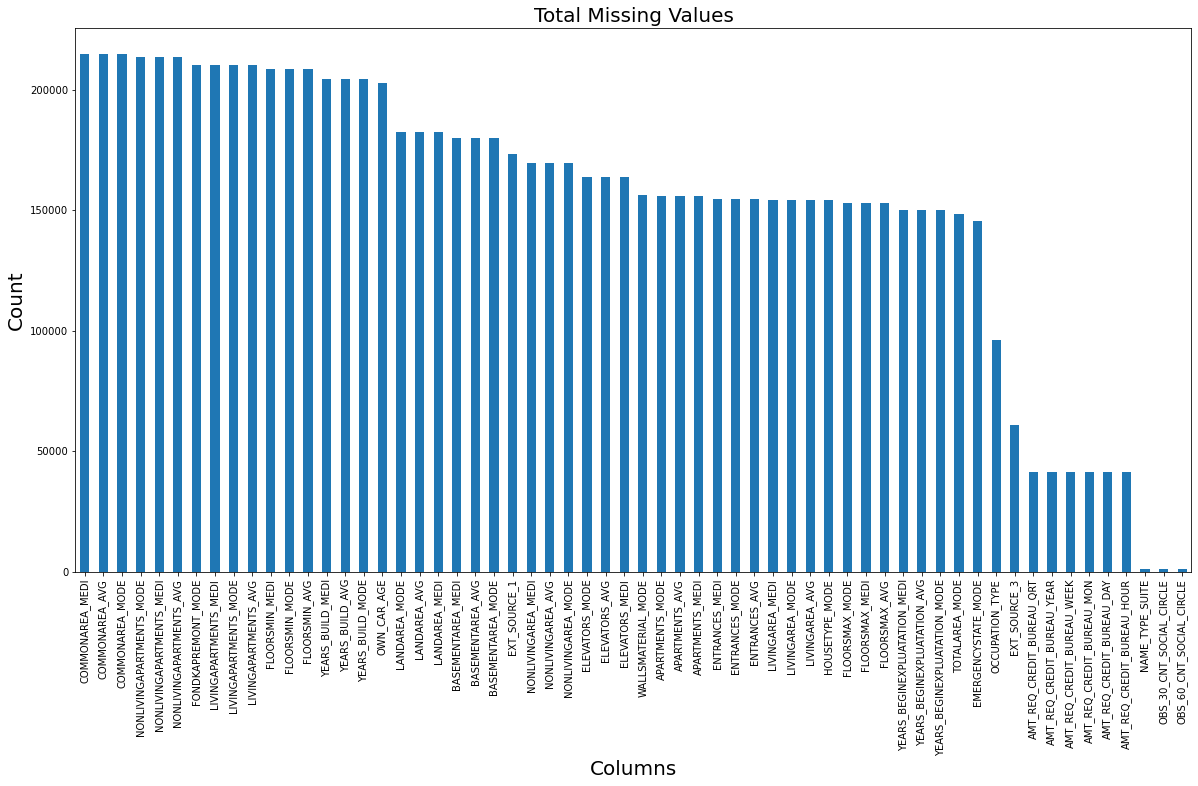

In [4]:
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(60)
total_select.plot(kind="bar", figsize = (20,10), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [5]:
# Function to calculate missing values by column# Funct 
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [6]:
# imbalance data set
percent = df["TARGET"].value_counts().rename_axis('unique_values').reset_index(name='counts')
percent['percentage'] = percent['counts'] / sum(percent['counts']) *100
percent

,unique_values,counts,percentage
0,0,282686,91.927118
1,1,24825,8.072882


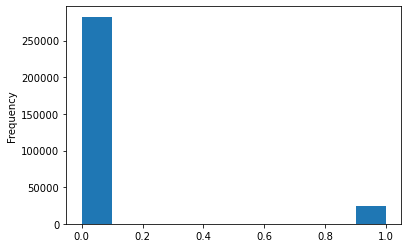

In [7]:
df['TARGET'].astype(int).plot.hist();

In [8]:
missing_value_check=missing_values_table(df)
missing_value_check[missing_value_check['% of Total Values']>30]

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [20]:
#Drop column percentage missing value greater than 32
perc = 32
min_count =  int(((100-perc)/100)*df.shape[0] + 1)

mod_df = df.dropna( axis=1, 
                thresh=min_count)
print("Original Dataframe : ")
print(df.shape)
print("Modified Dataframe : ")
print(mod_df.shape)

Original Dataframe : 
(307511, 122)
Modified Dataframe : 
(307511, 73)


In [10]:
#Dataset no duplicate
mod_df.duplicated().sum()

0

In [11]:
test = mod_df.iloc[:,:20]

In [12]:
missing_value_check=missing_values_table(mod_df)
missing_value_check

Your selected dataframe has 73 columns.
There are 18 columns that have missing values.


,Missing Values,% of Total Values
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [21]:
# fill outlier with mean of income labor
mean_labor_income = mod_df[(mod_df['OCCUPATION_TYPE']=='Laborers') 
& (mod_df['AMT_INCOME_TOTAL']<1170000000)]['AMT_INCOME_TOTAL'].mean()
mod_df.loc[mod_df['AMT_INCOME_TOTAL']>=117000000.0,'AMT_INCOME_TOTAL'] = np.nan
mod_df['AMT_INCOME_TOTAL'].fillna(mean_labor_income,inplace=True)


C:\Users\N\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\N\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
mod_df['AGE']= round(abs(mod_df['DAYS_BIRTH'] / 365))
mod_df['YEAR_EMPLOYED']= round(abs(mod_df['DAYS_EMPLOYED'] / 365))
mod_df['AGE_RANGE'] = pd.cut(x=mod_df['AGE'], bins=[20, 25, 30,40,50,60,70])

<ipython-input-22-b92cc46eb85b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['AGE']= round(abs(mod_df['DAYS_BIRTH'] / 365))
<ipython-input-22-b92cc46eb85b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['YEAR_EMPLOYED']= round(abs(mod_df['DAYS_EMPLOYED'] / 365))
<ipython-input-22-b92cc46eb85b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [23]:
mod_df['DAYS_EMPLOYED_ERROR'] = mod_df["DAYS_EMPLOYED"] == 365243
mod_df["DAYS_EMPLOYED_ERROR"] = mod_df["DAYS_EMPLOYED_ERROR"].astype(int)
mod_df['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

<ipython-input-23-d126886d8be5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['DAYS_EMPLOYED_ERROR'] = mod_df["DAYS_EMPLOYED"] == 365243
<ipython-input-23-d126886d8be5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df["DAYS_EMPLOYED_ERROR"] = mod_df["DAYS_EMPLOYED_ERROR"].astype(int)
C:\Users\N\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://panda

In [24]:
mod_df.loc[mod_df['OCCUPATION_TYPE'].isnull(),'OCCUPATION_TYPE'] = 'not identified '

In [25]:
mod_df.loc[mod_df['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull(),'AMT_REQ_CREDIT_BUREAU_YEAR'] = mod_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
mod_df.loc[mod_df['AMT_REQ_CREDIT_BUREAU_QRT'].isnull(),'AMT_REQ_CREDIT_BUREAU_QRT'] = mod_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
mod_df.loc[mod_df['AMT_REQ_CREDIT_BUREAU_MON'].isnull(),'AMT_REQ_CREDIT_BUREAU_MON'] = mod_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
mod_df.loc[mod_df['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull(),'AMT_REQ_CREDIT_BUREAU_WEEK'] = mod_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
mod_df.loc[mod_df['AMT_REQ_CREDIT_BUREAU_DAY'].isnull(),'AMT_REQ_CREDIT_BUREAU_DAY'] = mod_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()
mod_df.loc[mod_df['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull(),'AMT_REQ_CREDIT_BUREAU_HOUR'] = mod_df['AMT_REQ_CREDIT_BUREAU_YEAR'].median()


C:\Users\N\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [26]:
mod_df.loc[mod_df['DEF_60_CNT_SOCIAL_CIRCLE'].isnull(),'DEF_60_CNT_SOCIAL_CIRCLE'] = mod_df['DEF_60_CNT_SOCIAL_CIRCLE'].median()
mod_df.loc[mod_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull(),'DEF_30_CNT_SOCIAL_CIRCLE'] = mod_df['DEF_30_CNT_SOCIAL_CIRCLE'].median()
mod_df.loc[mod_df['OBS_60_CNT_SOCIAL_CIRCLE'].isnull(),'OBS_60_CNT_SOCIAL_CIRCLE'] = mod_df['OBS_60_CNT_SOCIAL_CIRCLE'].median()
mod_df.loc[mod_df['OBS_30_CNT_SOCIAL_CIRCLE'].isnull(),'OBS_30_CNT_SOCIAL_CIRCLE'] = mod_df['OBS_30_CNT_SOCIAL_CIRCLE'].median()



In [27]:
mod_df['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [28]:
mod_df.loc[mod_df['NAME_FAMILY_STATUS'].isnull(),'NAME_FAMILY_STATUS'] = 'Single / not married'
mod_df.loc[mod_df['CNT_FAM_MEMBERS'].isnull(),'CNT_FAM_MEMBERS'] = 0
mod_df.loc[mod_df['NAME_TYPE_SUITE'].isnull(),'NAME_TYPE_SUITE'] = 'not identified'

In [29]:
mod_df['AMT_GOODS_PRICE'].fillna(df['AMT_CREDIT'], inplace=True)

C:\Users\N\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [30]:
mod_df[mod_df['AMT_GOODS_PRICE']==450000.0][['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_GOODS_PRICE','AMT_ANNUITY']]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_GOODS_PRICE,AMT_ANNUITY
22,450000.0,497520.0,450000.0,32521.5
35,112500.0,450000.0,450000.0,44509.5
68,157500.0,450000.0,450000.0,22500.0
69,180000.0,450000.0,450000.0,21109.5
70,180000.0,450000.0,450000.0,21109.5
...,...,...,...,...
307471,112500.0,592560.0,450000.0,32274.0
307479,112500.0,521280.0,450000.0,31630.5
307484,540000.0,545040.0,450000.0,35617.5
307489,225000.0,521280.0,450000.0,23089.5


In [31]:
mod_df['YEAR_CONTRACT']=mod_df['AMT_GOODS_PRICE']/mod_df['AMT_ANNUITY']
mod_df['YEAR_CONTRACT'].fillna(20, inplace=True)

<ipython-input-31-d72df3b37e36>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['YEAR_CONTRACT']=mod_df['AMT_GOODS_PRICE']/mod_df['AMT_ANNUITY']
C:\Users\N\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [32]:
mod_df.loc[mod_df['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = mod_df['AMT_GOODS_PRICE']/20

C:\Users\N\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [33]:
mod_df['EXT_SOURCE_1'] = df['EXT_SOURCE_1']

<ipython-input-33-4e9d198aad82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['EXT_SOURCE_1'] = df['EXT_SOURCE_1']


In [34]:
mod_df['DAYS_LAST_PHONE_CHANGE'].fillna(mod_df['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)

In [35]:
missing_value_check=missing_values_table(mod_df)
missing_value_check

Your selected dataframe has 79 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
EXT_SOURCE_1,173378,56.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
NAME_TYPE_SUITE,1292,0.4
EXT_SOURCE_2,660,0.2


In [49]:
df1 = mod_df.copy()
df1= df1.drop('TARGET', axis='columns')
df1.nunique()

SK_ID_CURR             307511
NAME_CONTRACT_TYPE          2
CODE_GENDER                 3
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
                        ...  
YEAR_EMPLOYED              51
AGE_RANGE                   6
DAYS_EMPLOYED_ERROR         2
YEAR_CONTRACT           36432
EXT_SOURCE_1           114584
Length: 78, dtype: int64

In [50]:
missing_value_check=missing_values_table(df1)
missing_value_check

Your selected dataframe has 78 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
EXT_SOURCE_1,173378,56.4
OCCUPATION_TYPE,96391,31.3
EXT_SOURCE_3,60965,19.8
NAME_TYPE_SUITE,1292,0.4
EXT_SOURCE_2,660,0.2


In [51]:
for i in [ i for i in df1.columns if df1[i].isnull().any()]:
  df1[i+'_m'] = np.where(df1[i].isnull(),True,False)
df1

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,YEAR_EMPLOYED,AGE_RANGE,DAYS_EMPLOYED_ERROR,YEAR_CONTRACT,EXT_SOURCE_1,NAME_TYPE_SUITE_m,OCCUPATION_TYPE_m,EXT_SOURCE_2_m,EXT_SOURCE_3_m,EXT_SOURCE_1_m
0,100002,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,2.0,"(25, 30]",0,14.210239,0.083037,False,False,False,False,False
1,100003,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,3.0,"(40, 50]",0,31.639985,0.311267,False,False,False,True,False
2,100004,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,1.0,"(50, 60]",0,20.000000,NaN,False,False,False,False,True
3,100006,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,8.0,"(50, 60]",0,10.004548,NaN,False,False,False,True,True
4,100007,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,8.0,"(50, 60]",0,23.461618,NaN,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,...,1.0,"(25, 30]",0,8.164598,0.145570,False,False,False,True,False
307507,456252,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,...,1001.0,"(50, 60]",1,18.747657,NaN,False,True,False,True,True
307508,456253,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,...,22.0,"(40, 50]",0,19.513660,0.744026,False,False,False,False,False
307509,456254,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,...,13.0,"(30, 40]",0,15.812918,NaN,False,False,False,False,True


In [52]:
for col in df1.select_dtypes(include='number'):
    print(col)
    q = df1[col].nunique()
    print(q)
    if q > 20 :
        q = round(q /2)
        df1[col] =pd.qcut(df1[col], q=q,duplicates='drop').astype('category')
    else:
        df1[col] =pd.qcut(df1[col], q=q,duplicates='drop').astype('category')
   

SK_ID_CURR
307511
CNT_CHILDREN
15
AMT_INCOME_TOTAL
2548
AMT_CREDIT
5603
AMT_ANNUITY
13673
AMT_GOODS_PRICE
1002
REGION_POPULATION_RELATIVE
81
DAYS_BIRTH
17460
DAYS_EMPLOYED
12573
DAYS_REGISTRATION
15688
DAYS_ID_PUBLISH
6168
FLAG_MOBIL
2
FLAG_EMP_PHONE
2
FLAG_WORK_PHONE
2
FLAG_CONT_MOBILE
2
FLAG_PHONE
2
FLAG_EMAIL
2
CNT_FAM_MEMBERS
18
REGION_RATING_CLIENT
3
REGION_RATING_CLIENT_W_CITY
3
HOUR_APPR_PROCESS_START
24
REG_REGION_NOT_LIVE_REGION
2
REG_REGION_NOT_WORK_REGION
2
LIVE_REGION_NOT_WORK_REGION
2
REG_CITY_NOT_LIVE_CITY
2
REG_CITY_NOT_WORK_CITY
2
LIVE_CITY_NOT_WORK_CITY
2
EXT_SOURCE_2
119831
EXT_SOURCE_3
814
OBS_30_CNT_SOCIAL_CIRCLE
33
DEF_30_CNT_SOCIAL_CIRCLE
10
OBS_60_CNT_SOCIAL_CIRCLE
33
DEF_60_CNT_SOCIAL_CIRCLE
9
DAYS_LAST_PHONE_CHANGE
3773
FLAG_DOCUMENT_2
2
FLAG_DOCUMENT_3
2
FLAG_DOCUMENT_4
2
FLAG_DOCUMENT_5
2
FLAG_DOCUMENT_6
2
FLAG_DOCUMENT_7
2
FLAG_DOCUMENT_8
2
FLAG_DOCUMENT_9
2
FLAG_DOCUMENT_10
2
FLAG_DOCUMENT_11
2
FLAG_DOCUMENT_12
2
FLAG_DOCUMENT_13
2
FLAG_DOCUMENT_14
2
FLAG_D

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 83 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  category
 1   NAME_CONTRACT_TYPE           307511 non-null  object  
 2   CODE_GENDER                  307511 non-null  object  
 3   FLAG_OWN_CAR                 307511 non-null  object  
 4   FLAG_OWN_REALTY              307511 non-null  object  
 5   CNT_CHILDREN                 307511 non-null  category
 6   AMT_INCOME_TOTAL             307511 non-null  category
 7   AMT_CREDIT                   307511 non-null  category
 8   AMT_ANNUITY                  307511 non-null  category
 9   AMT_GOODS_PRICE              307511 non-null  category
 10  NAME_TYPE_SUITE              306219 non-null  object  
 11  NAME_INCOME_TYPE             307511 non-null  object  
 12  NAME_EDUCATION_TYPE          307511 non-null

In [ ]:
# Cramer use for check correlation between columns like chisq test for test H0 and H1 ?????
import association_metrics as am

df_category = df1.apply(lambda x: x.astype("category") if x.dtype == "bool" else x)
cramersv = am.CramersV(df_category)

cramersv.fit()[['NAME_TYPE_SUITE_m','OCCUPATION_TYPE_m','EXT_SOURCE_2_m','EXT_SOURCE_3_m','EXT_SOURCE_1_m']][:19]

In [ ]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = mod_df.dtypes[mod_df.dtypes == np.object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fields
print(one_hot_encode_cols)
#mod_df[one_hot_encode_cols].head().T

In [ ]:
mod_df1 = pd.get_dummies(mod_df, columns=one_hot_encode_cols, drop_first=True)
mod_df1.describe().T

In [ ]:
sns.boxplot(x=mod_df['DAYS_LAST_PHONE_CHANGE'])

In [ ]:
sns.displot(data=mod_df, x='DEF_30_CNT_SOCIAL_CIRCLE')

In [ ]:
mod_df1.columns

In [ ]:
mod_df1.info(verbose=True)

In [ ]:
mod_df1 = mod_df1.drop(['DAYS_EMPLOYED','AGE_RANGE','DAYS_BIRTH','DAYS_LAST_PHONE_CHANGE'],axis=1)
#mod_df1.drop(["TARGET","AGE_RANGE"], axis=1).apply(lambda x: x.corr(mod_df1.TARGET)).sort_values(ascending=False)

correlations = mod_df1.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

### Key Findings and Insights
- Low-skill Laborers have higest percentage of not pay 
- most of clint not have a child and No. of children not impact percentage of not pay 
- Hosing type of Rented apartment and with parent it higher percentage of not pay

In [ ]:
mod_df['OCCUPATION_TYPE'].value_counts()

In [ ]:
percentage = mod_df.groupby(["OCCUPATION_TYPE", "TARGET"]).size().reset_index()
percentage['%'] = percentage[0] / percentage.groupby("OCCUPATION_TYPE")[0].transform('sum') * 100

In [ ]:
# accountant lowest percentage and Low-skill Labors Highest 
percentage[percentage['TARGET']==1].sort_values(by='%',ascending=False)

In [ ]:
# Laborers	164240.355724 exclude 11700000000
chidren = mod_df[mod_df['AMT_INCOME_TOTAL'] < 1170000000 ]
income = chidren.groupby("OCCUPATION_TYPE")["AMT_INCOME_TOTAL"].mean().reset_index()
income.sort_values(by='AMT_INCOME_TOTAL')

In [ ]:

sns.displot(data=mod_df, x="AMT_REQ_CREDIT_BUREAU_MON")

In [ ]:
cnt = mod_df['CNT_CHILDREN'].value_counts().reset_index()
sns.barplot(x = 'index',y = 'CNT_CHILDREN',data = cnt)
plt.show()

In [ ]:
child = mod_df.groupby(["NAME_EDUCATION_TYPE", "TARGET"]).size().reset_index()
child['%'] = child[0] / child.groupby("NAME_EDUCATION_TYPE")[0].transform('sum') * 100
child

In [ ]:
child = mod_df.groupby(["NAME_HOUSING_TYPE", "TARGET"]).size().reset_index()
child['%'] = child[0] / child.groupby("NAME_HOUSING_TYPE")[0].transform('sum') * 100
child

In [ ]:
mod_df1.head(10)

In [ ]:

sns.kdeplot(data=mod_df, x="AMT_REQ_CREDIT_BUREAU_QRT")

In [ ]:
mod_df['AMT_INCOME_TOTAL'].max()

In [ ]:
# Create a list of float colums to check for skewing
mask = mod_df.dtypes == np.float
float_cols = mod_df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = mod_df[float_cols].skew()

In [ ]:
# Showing the skewed columns
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skew_cols

In [ ]:
mod_df[['SK_ID_CURR','AMT_INCOME_TOTAL']].sort_values(by='AMT_INCOME_TOTAL',ascending=False)

### Formulating at least 3 hypothesis about this data

### Conducting a formal significance test for one of the hypotheses and discuss the results


H_A:μ_1−μ_2≠0  There is no difference between the BMI of male and BMI of female.

H_A:μ_1−μ_2≠0  There is a difference between the BMI of male and BMI of female.

In [ ]:
mod_df['CODE_GENDER'].unique()

In [ ]:
female=mod_df.loc[mod_df.CODE_GENDER=="F"]
male=mod_df.loc[mod_df.CODE_GENDER=="M"]

In [ ]:
f_bmi = female.AMT_INCOME_TOTAL
m_bmi = male.AMT_INCOME_TOTAL
print(m_bmi)

In [ ]:
sns.distplot(f_bmi,color='green',hist=False)
sns.distplot(m_bmi,color='red',hist=False)

In [ ]:
female.AMT_INCOME_TOTAL.mean()

In [ ]:
male.AMT_INCOME_TOTAL.mean()

In [ ]:
import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm 
alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_bmi, f_bmi)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

In [ ]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between AMT_INCOME_TOTAL of females and AMT_INCOME_TOTAL of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between AMT_INCOME_TOTAL of females and AMT_INCOME_TOTAL of males.")

In [ ]:
female_children = female.loc[female['CNT_CHILDREN']<=5]

In [ ]:
female_children.groupby([female_children.CNT_CHILDREN]).mean().AMT_INCOME_TOTAL

In [ ]:
sns.boxplot(x="CNT_CHILDREN", y="AMT_INCOME_TOTAL", data=female_children)
plt.grid()
plt.show()

In [ ]:
formula = 'AMT_INCOME_TOTAL ~ C(CNT_CHILDREN)'
model = ols(formula, female_children).fit()
aov_table = anova_lm(model)
aov_table

Conclusion. p-value is 0.000948 and it is lower than the alpha (0.05), therefore we  reject the null hypothesis and conclude that the mean AMT_INCOME_TOTA of famliy with no until five children are the different.

In [ ]:
contingency= pd.crosstab(mod_df.NAME_HOUSING_TYPE, mod_df.TARGET)
contingency

In [ ]:
 contingency.plot(kind='bar')

In [ ]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

In [ ]:
if (p_val < 0.05):
    print('Reject the null hypothesis, that the TARGET proportions from HOUSING_TYPE are not significantly different across the different regions')
else:
    print('Accept the null hypothesis, that the TARGET proportions from HOUSING_TYPE s are not significantly different across the different regions')

### Suggestions for next steps in analyzing this data

#### A paragraph that summarizes the quality of this data set and a request for additional data if needed

- this dataset have 122 columns but 50 columns have more 50 percent missing value and column DAYS_EMPLOYED have differrent format and AMT_INCOME_TOTAL is very spread and many outlier next step will make credit score and use anlysis EX_1 EX_2 EX_3
if we can collect more data we should collect expense per month of client it help to decide base on financial status of client 